In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 数据集的准备
from sklearn import datasets
iris = datasets.load_iris()
iris_x = iris.data
iris_y = iris.target

# 由于我们的逻辑回归解决的是二分类问题，所以我们值需要前两二分类的数据就可以啦
x = iris_x[iris_y<2, :2]
y = iris_y[iris_y < 2]

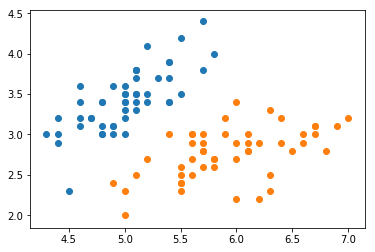

In [3]:
plt.scatter(x[y==0, 0], x[y==0, 1])
plt.scatter(x[y==1, 0], x[y==1, 1])
plt.show()

In [4]:
# 对我们的数据进行划分
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y)

In [5]:
# 定义我们sigmoid
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [6]:
# 定义我们的算是函数
def J(theta, x_b, y):
    y_hat = sigmoid(x_b.dot(theta))
    return -1/len(y) * np.sum((y * np.log(y_hat)) + ((1-y)*np.log(1-y_hat)))

In [7]:
# 定义我们的导数，前面我们已经用公式推导出来了
def dJ(theta, x_b, y):
    return x_b.T.dot(sigmoid(x_b.dot(theta)) - y) / len(y)

In [16]:
# 使用我们的梯度下降来求得最优解
def gradient_descent(theta, x_b, y):  
    # 利用我们的梯度下降来得到最佳的theta
    eta = 0.1 # 学习学率
    epsilon = 1e-8 # 相当于0的存在
    # 此时，我们的theta，应该是一个向量，不再是一个标量
    while True:
        gradient = dJ(theta, x_b, y)
        last_theta = theta
        theta = theta - eta * gradient # 进行迭代操作

        if abs(J(theta, x_b, y) - J(last_theta, x_b, y)) < epsilon:
            return theta  # 返回最佳的theta值
            break;

In [12]:
# 这在前面的线性回归中已经有涉及到了
x_b = np.hstack([ np.ones((len(train_x) ,1)),train_x])
initial_theta = np.zeros(x_b.shape[1])

In [18]:
theta = gradient_descent(initial_theta, x_b, train_y)

In [25]:
# 进行数据的预测
test_x_b = np.hstack([np.ones((len(test_x),1)), test_x])
y_predict = test_x_b.dot(theta)

In [27]:
y_predict   # 我们知道 > 0.5 为1， 小于0.5为0
# 这就与我们前面的decisipon_function会联系起来

array([ 22.23224608,  11.73375123,   8.60881646,  14.59160444,
        12.93375078,  19.03100229,  14.55344993,  25.1282538 ,
        -9.60662906,   9.88512502,  -8.21585696,  13.04821431,
        11.50482417, -14.31310847,  -8.44478402,  -8.06323892,
       -15.8183441 , -17.17096168, -20.33405097,   2.58787396,
         5.75096325,  18.99284778,  25.31902635,   0.96817481,
        11.6192877 ])

In [31]:
np.array(y_predict>=0.5, dtype='int')

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1])

In [34]:
test_y

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1])

In [39]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(train_x, train_y)
log_reg.decision_function(test_x)

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([ 3.55005607,  2.3121816 ,  1.5115783 ,  2.16064059,  1.42028741,
        2.47741154,  2.02461998,  3.53453568, -1.38775287,  0.89172534,
       -1.59954399,  1.82834925,  1.49605791, -2.65666812, -2.41566767,
       -1.05546153, -2.85293885, -2.50512711, -3.44175102,  0.7264954 ,
        1.66311931,  2.34139093,  4.21463875,  0.12216283,  1.90411975])

上述可以自行比较一下